In [1]:

# Mount the  drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Import the Required Packages

In [1]:

import os
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
from textblob import TextBlob,Word
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
from tqdm import tqdm
tqdm.pandas()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score,precision_score,recall_score

[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10060] A connection attempt failed because
[nltk_data]     the connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10065] A
[nltk_data]     socket operation was attempted to an unreachable host>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [ ]:
# Unzip the zipped file
! unzip '/content/drive/MyDrive/txt_reviews.zip' -d '/content/TT3'

In [ ]:

print(os.listdir())

['.config', 'drive', 'sample_data']


In [ ]:
root_dir=("/content/TT2/txt_reviews")
file_names = os.listdir("/content/TT3/txt_reviews")


In [ ]:
# Create the dataframe using the unzipped file
product_id=[]
userid=[]
profilename=[]
helpnessnumerator=[]
helpnessdenominator=[]
score=[]
time=[]
reviewsummary=[]
reviewtext=[]
for i in file_names:
    with open("/content/TT3/txt_reviews/"+i,"r") as f:
        d=f.readlines()
        p=d[0].split(":")
        u=d[1].split(":")
        pr=d[2].split(":")
        he=d[3].split(":")
        hel=d[4].split(":")
        s=d[5].split(":")
        t=d[6].split(":")
        rs=d[7].split(":")
        rt=d[8].split(":")
        product_id.append(p[1])
        userid.append(u[1])
        profilename.append(pr[1])
        helpnessnumerator.append(he[1])
        helpnessdenominator.append(hel[1])
        score.append(s[1])
        time.append(t[1])
        reviewsummary.append(rs[1])
        reviewtext.append(rt[1])
df=pd.DataFrame({"productid":product_id,"userid":userid,"profilename":profilename,"helpnessnumerator":helpnessnumerator
                 ,"helpnessdenominator":helpnessdenominator,"score":score,"time":time,"reviewsummary":reviewsummary,
                 "reviewtext":reviewtext})
df.head()

In [ ]:
for i in df.columns:
    df[i]=df[i].apply(lambda x: x.strip("\n"))

In [ ]:
df.head()

In [ ]:
# Save the created dataframe
df.to_csv('/content/drive/MyDrive/text_data.csv')

In [ ]:
# Load the dataframe
df=pd.read_csv('/content/drive/MyDrive/text_data.csv')

In [ ]:
df.head()

,Unnamed: 0,productid,userid,profilename,helpnessnumerator,helpnessdenominator,score,time,reviewsummary,reviewtext
0,0,B00086IB8O,A3QG1YR5Z5ENYM,Angel D. Rushing,1,1,2,1261785600,A little bitter - Not what I expected,I wanted to make a winter wedding cake that h...
1,1,B004OQADMQ,A1N0RUUU70QRZS,Christiane Shumake,0,0,5,1328486400,Not just for babies,I have to give my elderly mother pureed foods...
2,2,B005T7P2QQ,A235MEPJMXXF66,Frank R. Portscheller,0,0,5,1342310400,delicous,I recently came across this very delicous sod...
3,3,B007RTR8TS,AQCQ5F0OJXMG9,Crystal Starr Light,0,0,5,1338768000,"Goodbye Garnier Fructus, Hello Clear Scalp & ...",I have thick shoulder-length hair that every ...
4,4,B003P9XFW8,A1XZU3UA1LDHUM,"Kristol King ""k2ing1""",0,0,5,1351209600,Excellent Dog Food,My dog loves it and she absorbes it well. He...


In [ ]:
# Remove the insignificient feature
df=df.drop(['Unnamed: 0'],axis=1)

In [ ]:
# Shape of Data
df.shape

(568454, 9)

In [ ]:

# Basic information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   productid            568454 non-null  object
 1   userid               568454 non-null  object
 2   profilename          568454 non-null  object
 3   helpnessnumerator    568454 non-null  int64 
 4   helpnessdenominator  568454 non-null  int64 
 5   score                568454 non-null  int64 
 6   time                 568454 non-null  int64 
 7   reviewsummary        568454 non-null  object
 8   reviewtext           568454 non-null  object
dtypes: int64(4), object(5)
memory usage: 39.0+ MB


In [ ]:
# Checking for null values
df.isna().sum()

productid              0
userid                 0
profilename            0
helpnessnumerator      0
helpnessdenominator    0
score                  0
time                   0
reviewsummary          0
reviewtext             0
dtype: int64

In [ ]:
# Descriptive Statistics of the numerical data
df.describe().iloc[1:,:]

,helpnessnumerator,helpnessdenominator,score,time
mean,1.743817,2.22881,4.183199,1.296257e+09
std,7.636513,8.28974,1.310436,4.804331e+07
min,0.000000,0.00000,1.000000,9.393408e+08
25%,0.000000,0.00000,4.000000,1.271290e+09
50%,0.000000,1.00000,5.000000,1.311120e+09
75%,2.000000,2.00000,5.000000,1.332720e+09
max,866.000000,923.00000,5.000000,1.351210e+09


# Data Cleaning

In [ ]:
# Converted to the datetime datatype
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df.head()

,productid,userid,profilename,helpnessnumerator,helpnessdenominator,score,time,reviewsummary,reviewtext
0,B00086IB8O,A3QG1YR5Z5ENYM,Angel D. Rushing,1,1,2,1970-01-01 00:00:01.261785600,A little bitter - Not what I expected,I wanted to make a winter wedding cake that h...
1,B004OQADMQ,A1N0RUUU70QRZS,Christiane Shumake,0,0,5,1970-01-01 00:00:01.328486400,Not just for babies,I have to give my elderly mother pureed foods...
2,B005T7P2QQ,A235MEPJMXXF66,Frank R. Portscheller,0,0,5,1970-01-01 00:00:01.342310400,delicous,I recently came across this very delicous sod...
3,B007RTR8TS,AQCQ5F0OJXMG9,Crystal Starr Light,0,0,5,1970-01-01 00:00:01.338768000,"Goodbye Garnier Fructus, Hello Clear Scalp & ...",I have thick shoulder-length hair that every ...
4,B003P9XFW8,A1XZU3UA1LDHUM,"Kristol King ""k2ing1""",0,0,5,1970-01-01 00:00:01.351209600,Excellent Dog Food,My dog loves it and she absorbes it well. He...


In [ ]:

# Checking for duplicate values
df.duplicated().sum()

287

In [ ]:
# Drop the duplicates
df.drop_duplicates(inplace=True)

In [ ]:

# Checking for duplicate values
df.duplicated().sum()


0

In [ ]:
# Create the helpfulness feature using the given features helpnessnumerator and helpnessdenominator
df['helpfulness'] = df['helpnessnumerator']/df['helpnessdenominator']

In [ ]:
# We fill the missing values with 0 .In the above cell helpnessnumerator,helpnessdenominator may be zero.
df['helpfulness'].fillna(0,inplace=True)

In [ ]:
# Basic information after the cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568167 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   productid            568167 non-null  object        
 1   userid               568167 non-null  object        
 2   profilename          568167 non-null  object        
 3   helpnessnumerator    568167 non-null  int64         
 4   helpnessdenominator  568167 non-null  int64         
 5   score                568167 non-null  int64         
 6   time                 568167 non-null  datetime64[ns]
 7   reviewsummary        568167 non-null  object        
 8   reviewtext           568167 non-null  object        
 9   helpfulness          568167 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 47.7+ MB


# Exploratory Data Analysis

<Axes: >

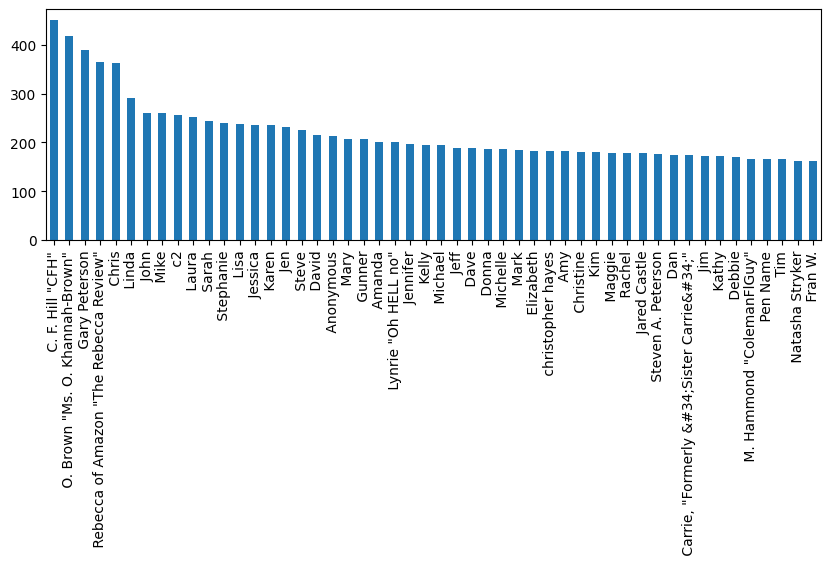

In [ ]:
df['profilename'].value_counts().iloc[:50].plot(kind='bar',figsize=(10,3))

## Observation
*Top 50 most regular customer names







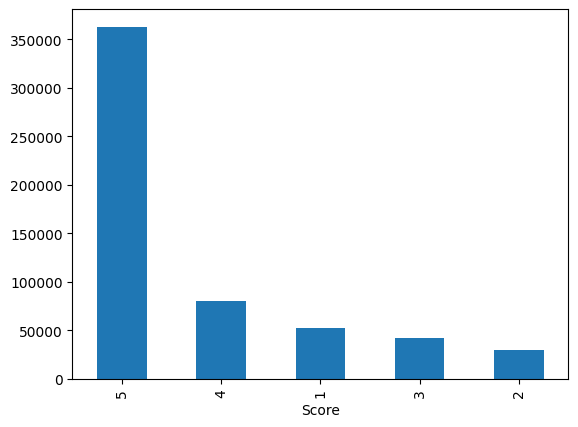

In [ ]:

df['score'].value_counts().plot(kind='bar')
plt.xlabel("Score")
plt.show()

## Observation
* Maximum customers scored 5 out of 5.
* The count of customers scored  1 out of 5 are more then the count of customers scored  2 out of 5  and 3 out of 5  

<Axes: >

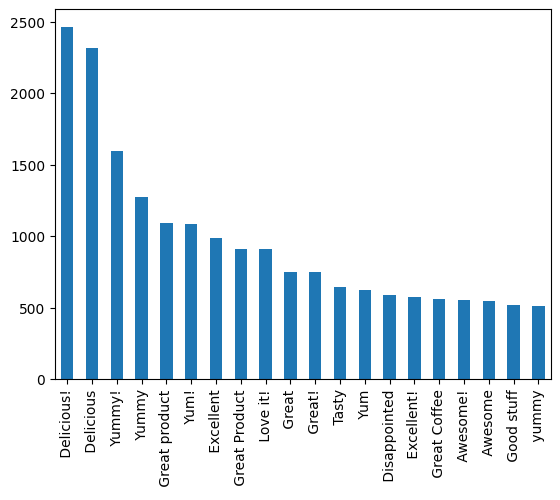

In [ ]:
df['reviewsummary'].value_counts().iloc[:20].plot(kind='bar')

## Observation
* Top 20 review summary




<Axes: >

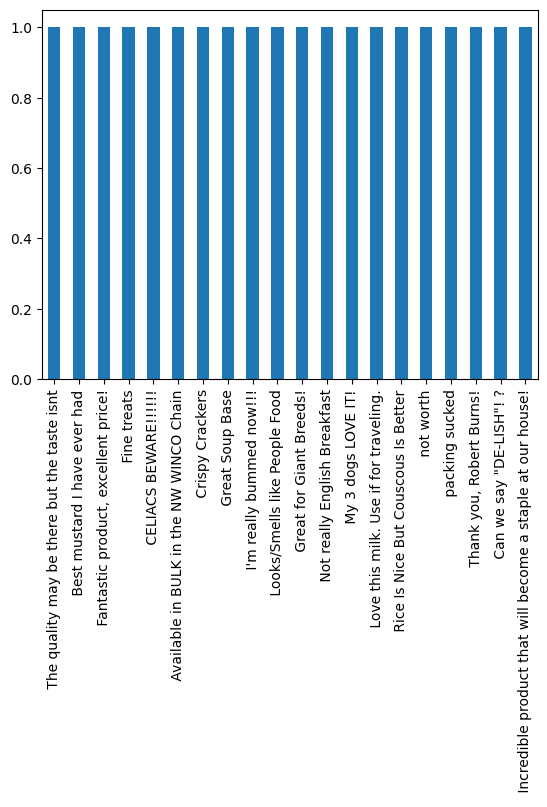

In [ ]:
df['reviewsummary'].value_counts().iloc[-20:].plot(kind='bar')

## Observation
* Bottom 20 review summary

In [ ]:
df.set_index('time',drop=True,inplace=True)

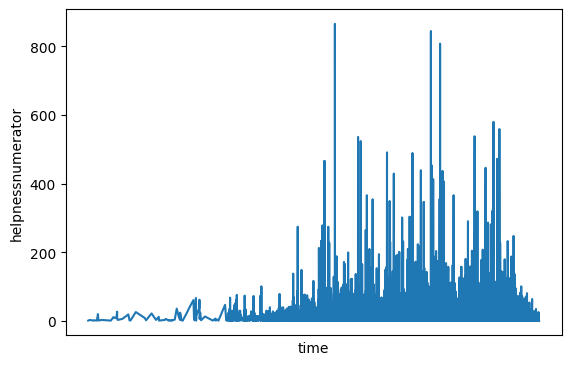

In [ ]:
df['helpnessnumerator'].plot()
plt.ylabel("helpnessnumerator")
plt.show()

# Observation 
* Number of users who found the review helpful increases as time incerases

In [ ]:
df.fillna(0,inplace=True)

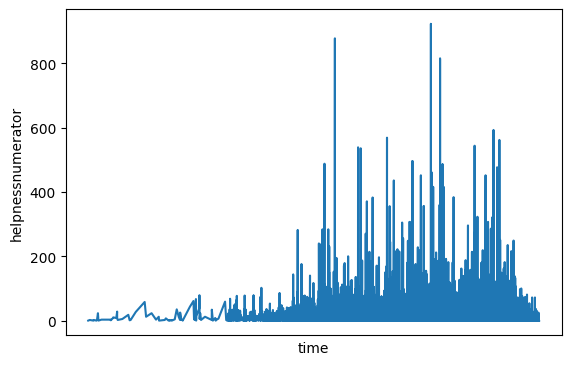

In [ ]:
df['helpnessdenominator'].plot()
plt.ylabel("helpnessnumerator")
plt.show()

# Observation
* Number of users who indicated whether they found the review helpful inceraces as time incerases

In [ ]:
df.reset_index(inplace=True)

In [ ]:
# Get the stop words
sw=stopwords.words('english')

In [ ]:
stemmer = PorterStemmer()
lemma = WordNetLemmatizer()

In [ ]:
# Creating a function for parts of speech taging 
def do_lemma(word_list):
    pos = 'n'
    output_list = []
    for i,j in nltk.pos_tag(word_list):
        if j.startswith("J"):
            pos = 'a'
        elif j.startswith("N"):
            pos = 'n'
        elif j.startswith("R"):
            pos = 'r' 
        elif j.startswith("V"):
            pos = 'v' 
        else:
            pos = 'n'
        output_list.append(lemma.lemmatize(i,pos=pos))
    return output_list

In [ ]:
# Creating a function for text cleaning

def clean_text(x,stem=True):
    x=re.sub(r'[^A-z0-9 ]','',x)
    x_list = x.lower().split()
    x_list = [word for word in x_list if word not in sw]
    #x_list = [str(TextBlob(word).correct()) for word in x_list if word not in sw]
    if stem:
        x_list= [stemmer.stem(i) for i in x_list]
    else : 
        x_list = do_lemma(x_list)
    return " ".join(x_list)

In [ ]:
df['text_clean_lemma'] = df['reviewtext'].progress_apply(clean_text)

100%|██████████| 568167/568167 [07:51<00:00, 1206.03it/s]


In [19]:
bow=CountVectorizer()
tfidf=TfidfVectorizer()

In [20]:
# Segregation of the text data
x = df['text_clean_lemma']
y = df['score']

In [27]:
# Spliting the data into train and split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=28)


In [22]:
# tranforming the training data
X_train_processed_bow = bow.fit_transform(X_train)
X_train_processed_tfidf = tfidf.fit_transform(X_train)

In [23]:
# tranforming the testing data
X_test_processed_bow = bow.transform(X_test)
X_test_processed_tfidf = tfidf.transform(X_test)

In [25]:
# Creating objects for machine learning algorthms
mnb=MultinomialNB()
dt=DecisionTreeClassifier(random_state=28)
rf=RandomForestClassifier(n_jobs=-1, random_state=28)
lr=LogisticRegression()
knn=KNeighborsClassifier()

## Multinomial Naive Bayes Algorthm

In [ ]:
# Building model
mnb.fit(X_train_processed_bow,y_train)
mnb_predict1 = mnb.predict(X_test_processed_bow)


In [ ]:
# Model evaluation
print('Using Bag of words')
print(accuracy_score(y_test,mnb_predict1))

Using Bag of words
0.7126250756434974


In [ ]:
# Building model
mnb.fit(X_train_processed_tfidf,y_train)
mnb_predict = mnb.predict(X_test_processed_tfidf)


In [ ]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,mnb_predict))

Using TF-IDF
0.6468750439787776


## k Nearest Neighbors classifier algorithm

In [ ]:
# Building model
knn.fit(X_train_processed_bow,y_train)
knn_predict = knn.predict(X_test_processed_bow)



Using Bag of words
              precision    recall  f1-score   support

           1       0.53      0.41      0.47     12996
           2       0.41      0.32      0.36      7482
           3       0.45      0.33      0.38     10551
           4       0.39      0.39      0.39     20105
           5       0.77      0.83      0.80     90980

    accuracy                           0.67    142114
   macro avg       0.51      0.46      0.48    142114
weighted avg       0.65      0.67      0.66    142114



In [ ]:
# Model evaluation
print('Using Bag of words')
print(accuracy_score(y_test,knn_predict))

Using Bag of words
0.4707066158154721


In [ ]:
# Building model
knn.fit(X_train_processed_tfidf,y_train)
knn_predict = knn.predict(X_test_processed_tfidf)


In [40]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,knn_predict))

Using TF-IDF
0.4707066158154721


## Random Forest classifier algorithm

In [ ]:
# Building model
rf.fit(X_train_processed_bow,y_train)
rf_predict1 = rf.predict(X_test_processed_bow)


In [ ]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,rf_predict1))

Using TF-IDF
0.5546392332915828


In [ ]:
# Building model
rf.fit(X_train_processed_tfidf,y_train)
rf_predict = rf.predict(X_test_processed_tfidf)


In [ ]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,rf_predict))

Using TF-IDF
0.7884022686012637


## Decision tree classifier algorithm

In [ ]:
# Building model
dt.fit(X_train_processed_bow,y_train)
dt_predict1 = dt.predict(X_test_processed_bow)


In [ ]:
# Model evaluation
print('Using bag of words')
print(accuracy_score(y_test,dt_predict1))

Using bag of words
0.7485821242101411


In [ ]:
# Building model
dt.fit(X_train_processed_tfidf,y_train)
dt_predict = dt.predict(X_test_processed_tfidf)


In [ ]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,dt_predict))

Using TF-IDF
0.739990430217994


## Logistic regression algorithm

In [ ]:
# Building model
lr.fit(X_train_processed_bow,y_train)
lr_predict = lr.predict(X_test_processed_bow)


Using Bag of words
0.737225044682438


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
# Model evaluation
print('Using Bag of words')
print(accuracy_score(y_test,lr_predict))

Using Bag of words
0.737225044682438


In [ ]:
# Building model
lr.fit(X_train_processed_tfidf,y_train)
lr_predict1 = lr.predict(X_test_processed_tfidf)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Model evaluation
print('Using TF-IDF')
print(accuracy_score(y_test,lr_predict1))

Using TF-IDF
0.7314831754788409


## Visualization of model accuracy


C:\Users\Admin\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Accuracy score using bag of words'}>

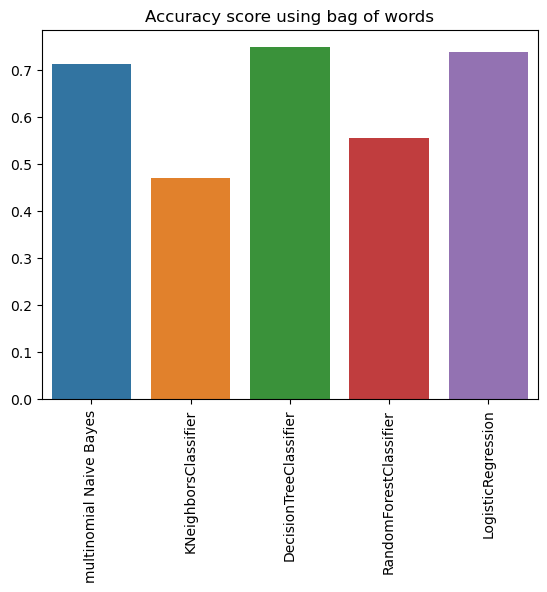

In [2]:
x = ["multinomial Naive Bayes",'KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
y = [0.7126250756434974,0.4707066158154721,0.7485821242101411,0.5546392332915828,0.737225044682438]

plt.title("Accuracy score using bag of words")
plt.xticks(rotation=90)
sns.barplot(x,y)



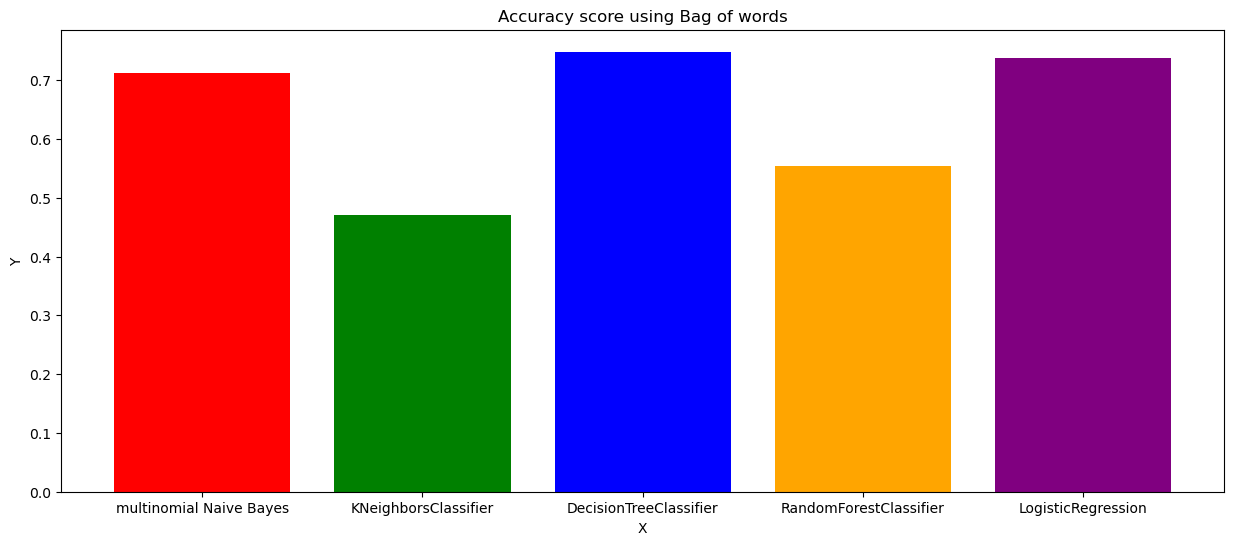

In [4]:
x = ["multinomial Naive Bayes",'KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
y = [0.7126250756434974,0.4707066158154721,0.7485821242101411,0.5546392332915828,0.737225044682438]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(15, 6))
plt.bar(x,y,color=colors[:len(x)])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Accuracy score using Bag of words')
plt.show()

## Visualization of model accuracy

C:\Users\Admin\Downloads\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Accuracy score using TF-IDF'}>

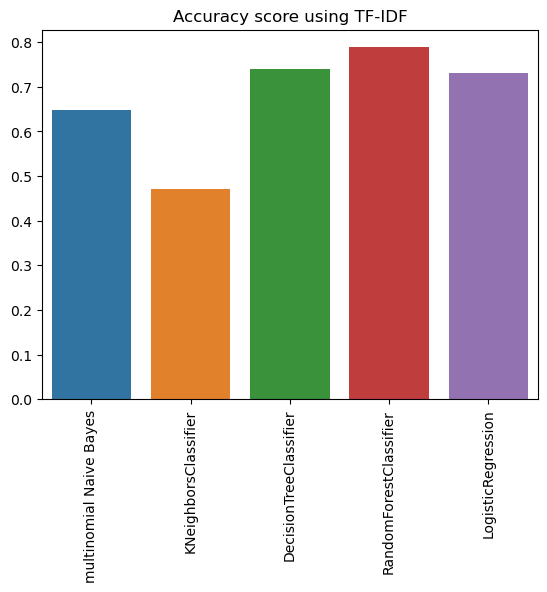

In [3]:
x = ["multinomial Naive Bayes",'KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
y = [0.6468750439787776,0.4707066158154721,0.739990430217994,0.7884022686012637,0.7314831754788409]

plt.title("Accuracy score using TF-IDF")

plt.xticks(rotation=90)
sns.barplot(x,y)

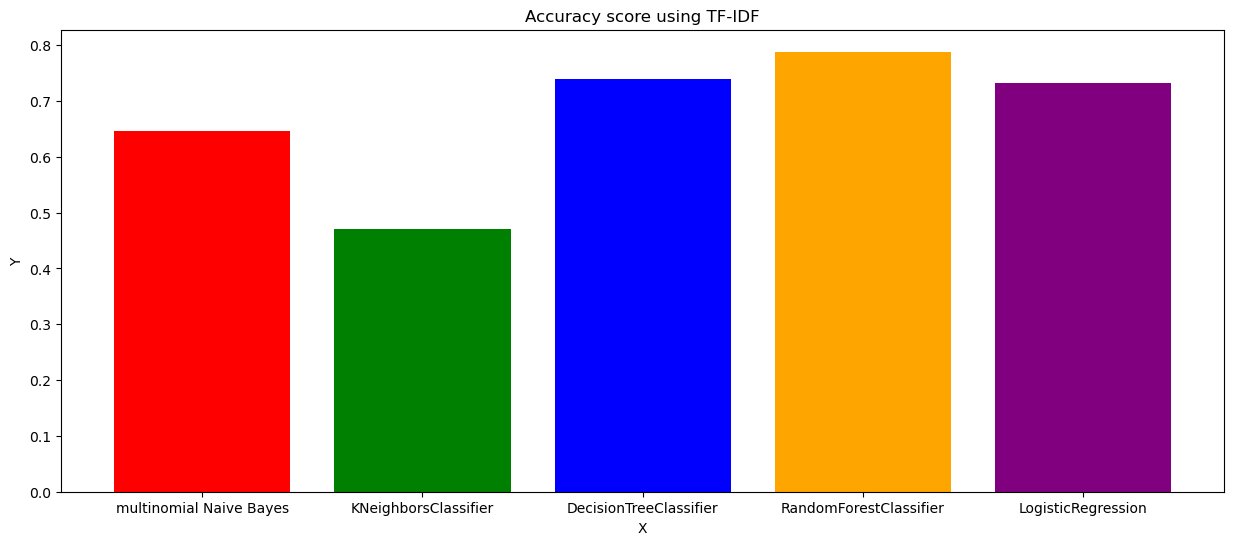

In [5]:
x = ["multinomial Naive Bayes",'KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression']
y = [0.6468750439787776,0.4707066158154721,0.739990430217994,0.7884022686012637,0.7314831754788409]
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(15, 6))
plt.bar(x,y,color=colors[:len(x)])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Accuracy score using TF-IDF')
plt.show()

# Observation
* Models accuracy using bag of words
    * Decision Tree classifier performed better than other models with 75% accuracy
* Models accuracy using TF-IDF
    * Random Forest classifier performed better than other models with 79% accuracy
    
    